In [105]:
import numpy as np
import pandas as pd
import sklearn
import missingno as msno
import plotly.express as px
import tabulate
import matplotlib.pyplot as p
import seaborn as sns

In [106]:
d1=pd.read_csv("/content/Car Details.csv")

In [107]:
d1.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [108]:
d1.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2.059000e+03,2059.000000,2.059000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,1.702992e+06,2016.425449,5.422471e+04,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,2.419881e+06,3.363564,5.736172e+04,442.458507,135.265825,136.073956,0.822170,15.110198
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,4.849990e+05,2014.000000,2.900000e+04,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1.925000e+06,2019.000000,7.200000e+04,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


In [109]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [110]:
d1.drop_duplicates(inplace=True)
print("\nNumber of duplicates records:")
print( d1.duplicated().sum())


Number of duplicates records:
0


<Axes: >

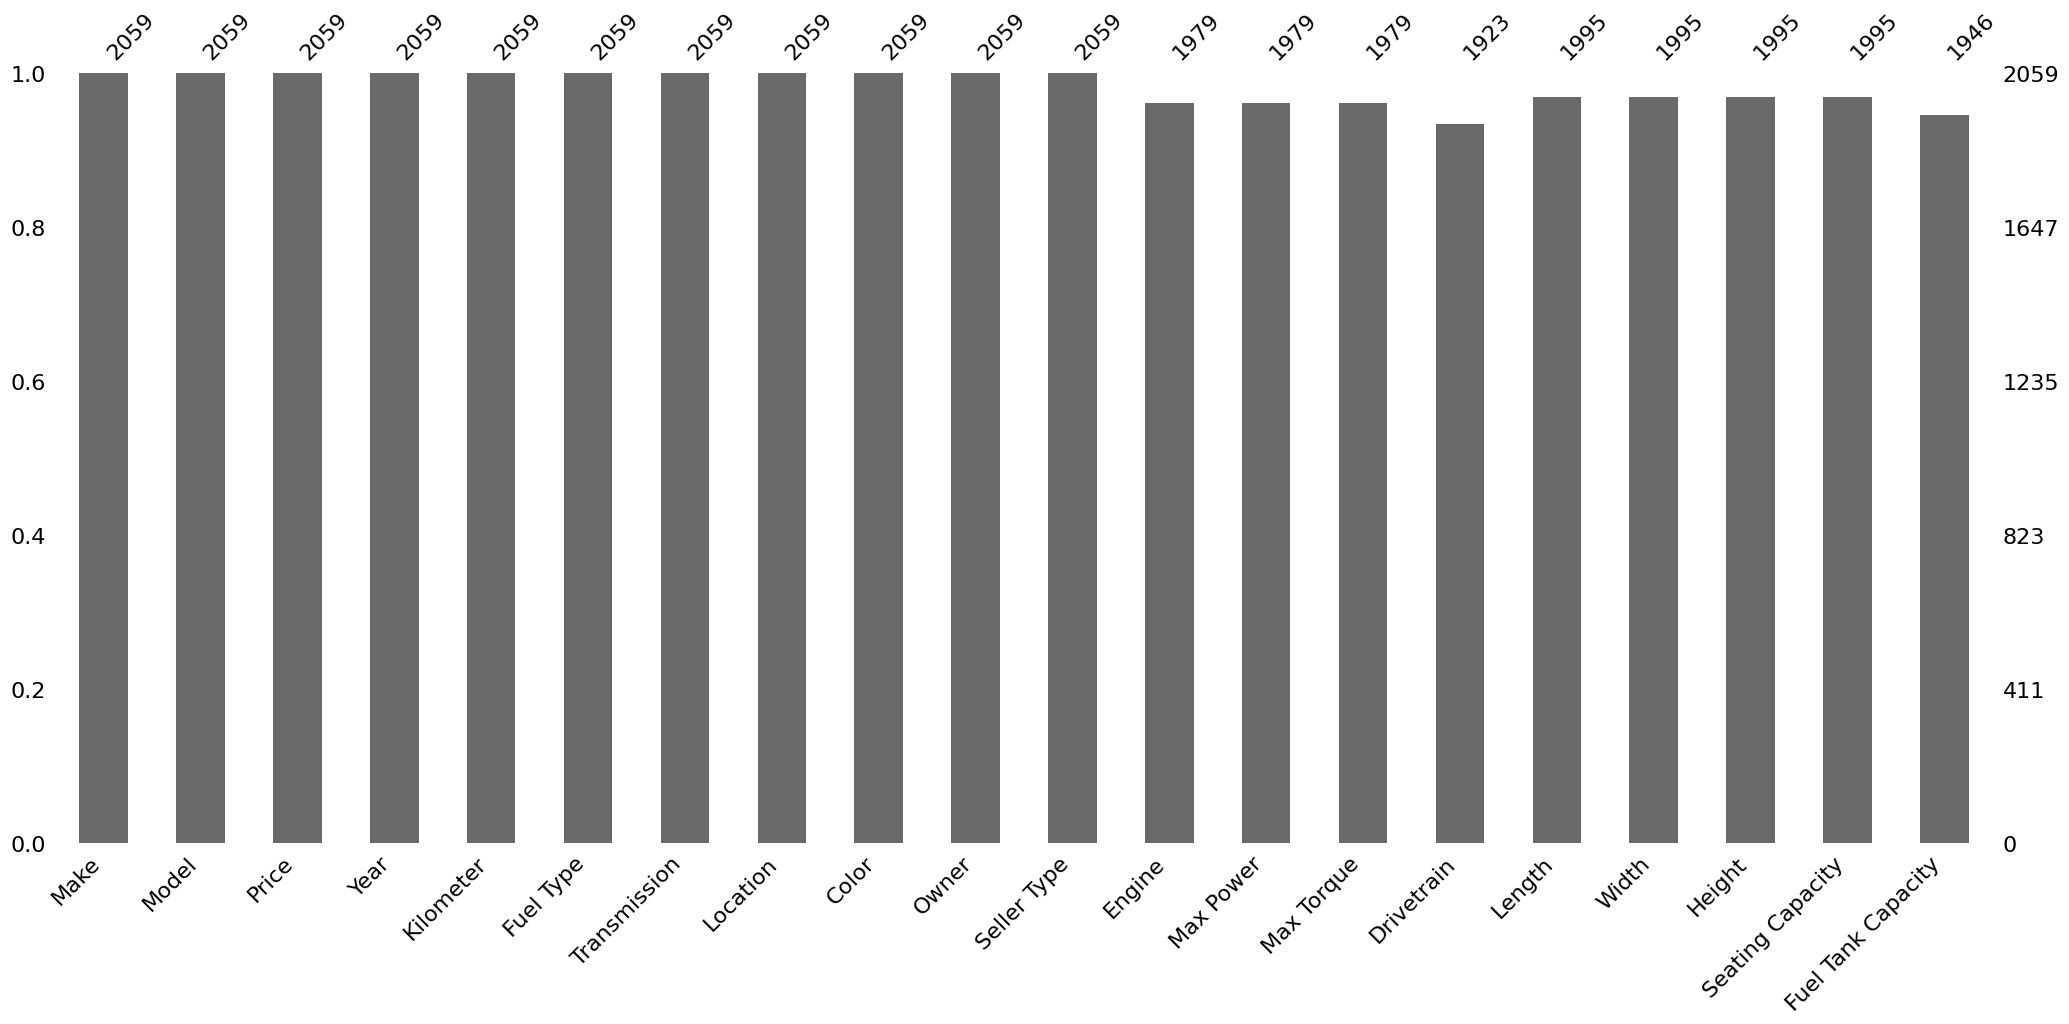

In [111]:
msno.bar(d1)

<Axes: >

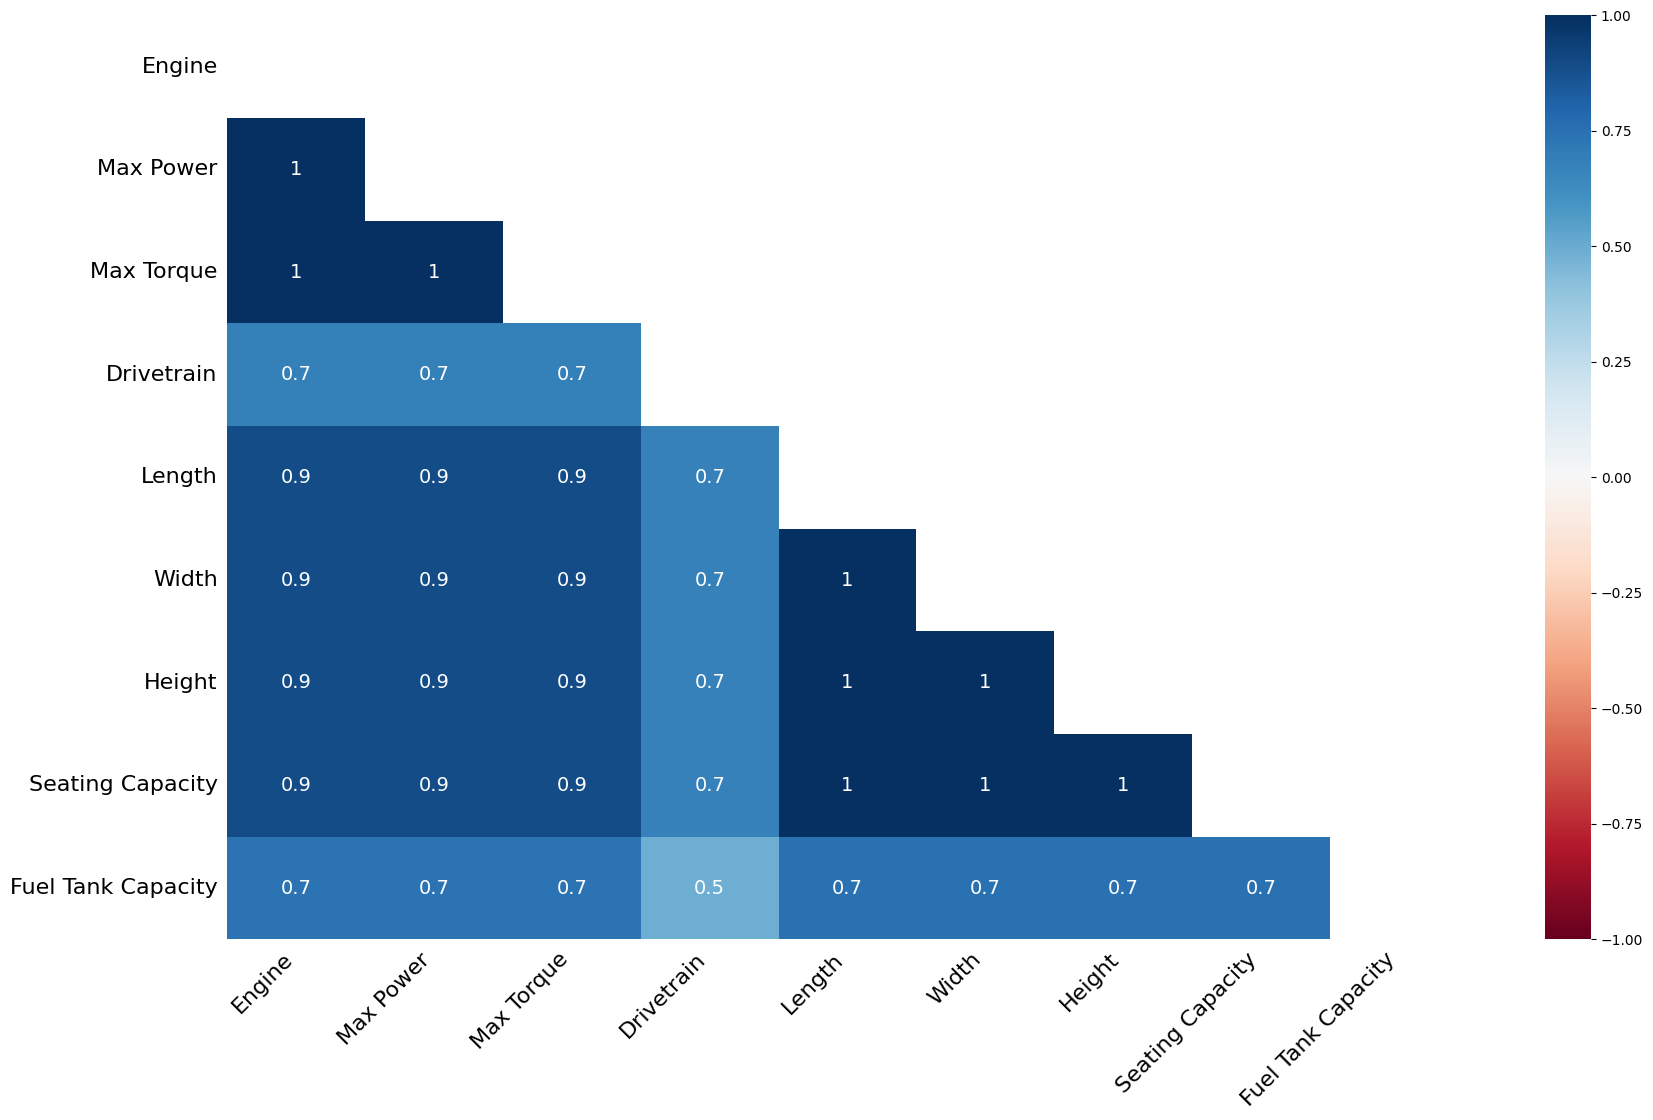

In [112]:
msno.heatmap(d1)

In [113]:
print("\nMissing values:")
print(d1.isnull().sum())



Missing values:
Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64


In [114]:
print("\nMissing values:")
print(d1.isnull().sum())


Missing values:
Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64


In [115]:
d1['Max Power'] = pd.to_numeric(d1['Max Power'], errors='coerce')

In [116]:
d1['Max Torque'] = pd.to_numeric(d1['Max Torque'], errors='coerce')

In [117]:
d1['Drivetrain'] = pd.to_numeric(d1['Drivetrain'], errors='coerce')

In [118]:
d1['Max Power'] = d1['Max Power'].fillna(d1['Max Power'].mean())
d1['Max Torque'] = d1['Max Torque'].fillna(d1['Max Torque'].median())
d1['Drivetrain'] = d1['Drivetrain'].fillna(d1['Drivetrain'].median())

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [119]:
d2=pd.read_csv("/content/price details.csv")

<Axes: >

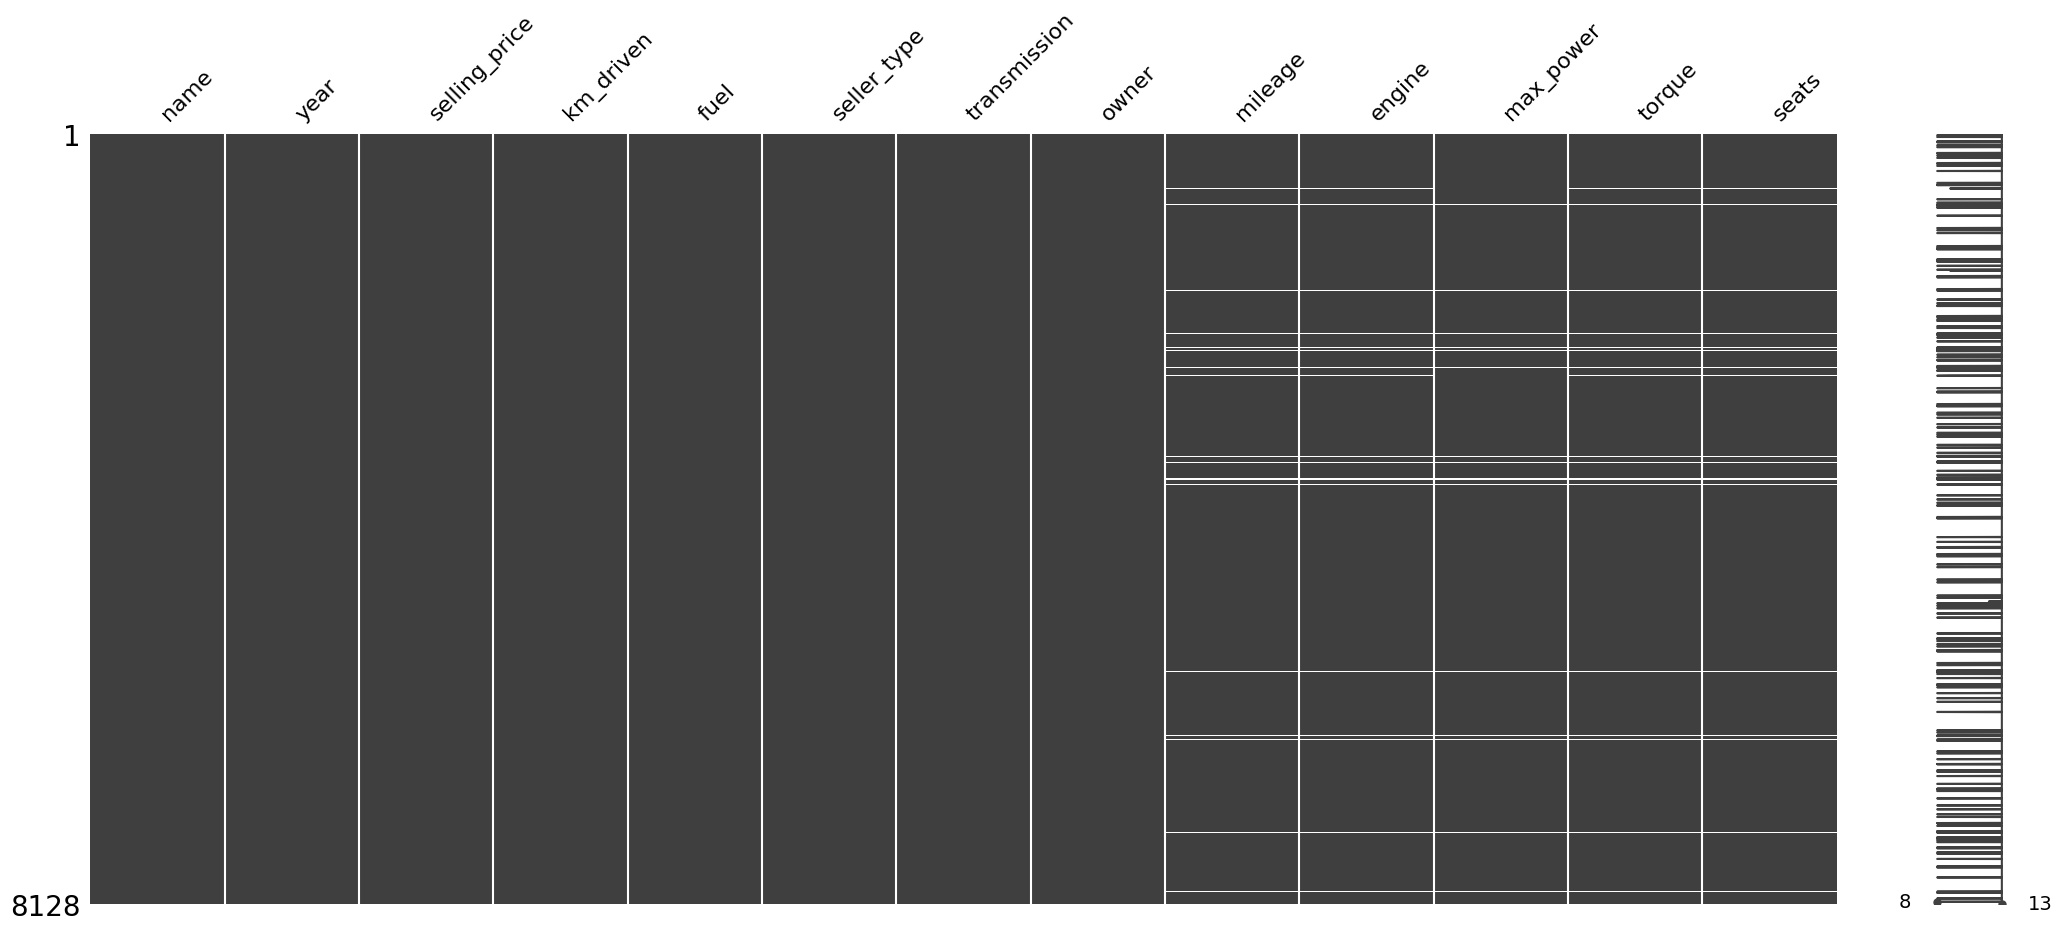

In [120]:
msno.matrix(d2)

In [121]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [122]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [123]:
X = d1.drop(['Seller Type'], axis=1)
y = d1['Seller Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (1647, 19) (1647,)
Testing set shape: (412, 19) (412,)


In [124]:
d1_train = pd.concat([X_train, y_train], axis=1)
d1_test = pd.concat([X_test, y_test], axis=1)
print("Training set shape:", d1_train.shape)
print("Testing set shape:", d1_test.shape)

Training set shape: (1647, 20)
Testing set shape: (412, 20)


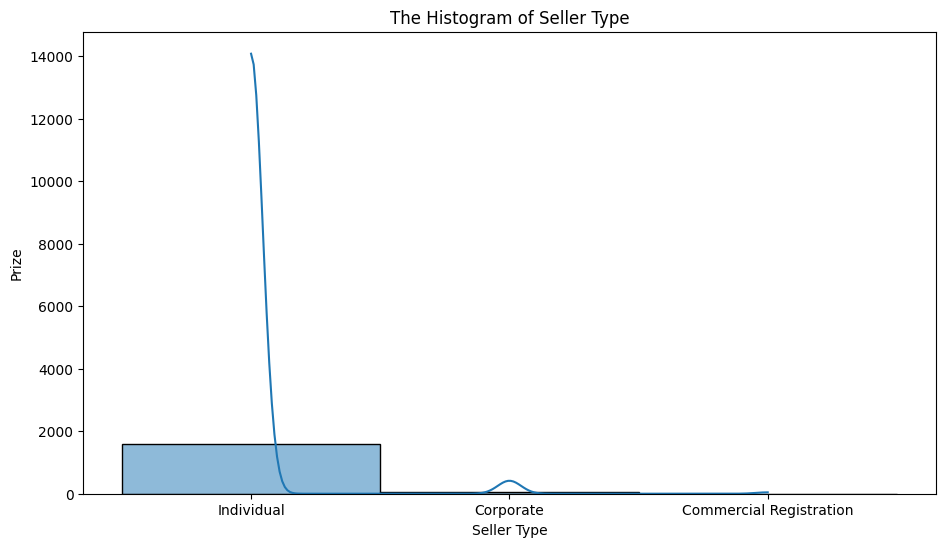

In [126]:
p.figure(figsize=(11, 6))
sns.histplot(data=d1_train, x='Seller Type', kde=True)
p.title('The Histogram of Seller Type')
p.xlabel('Seller Type')
p.ylabel('Prize')
p.show()

In [128]:
d1.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,NaN,NaN,NaN,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,NaN,NaN,NaN,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,NaN,NaN,NaN,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,NaN,NaN,NaN,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,NaN,NaN,NaN,4735.0,1830.0,1795.0,7.0,55.0


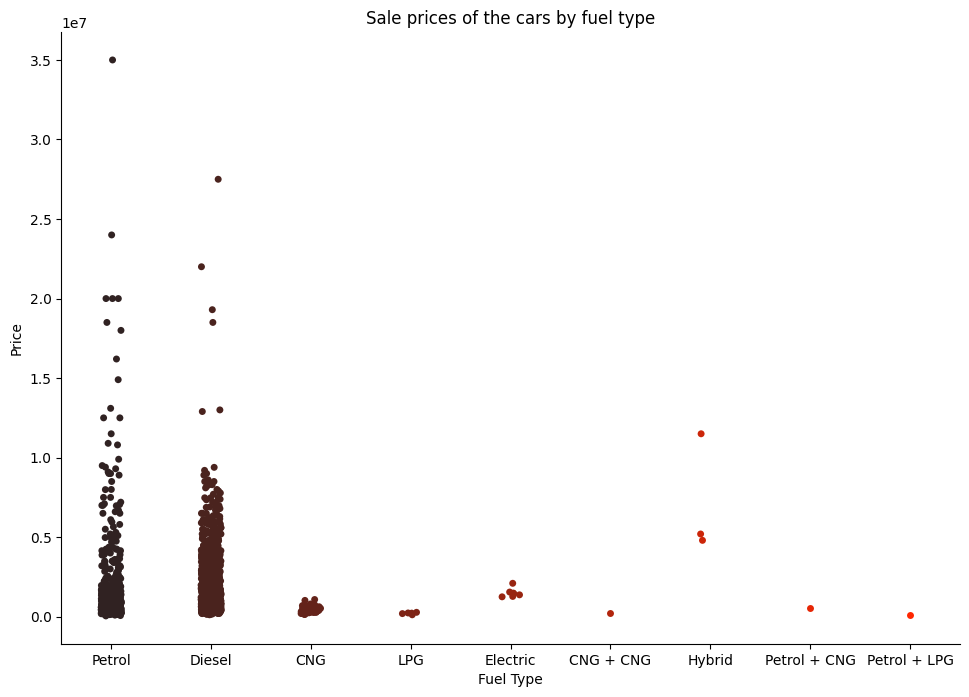

In [129]:
sns.catplot(x="Fuel Type",y="Price",kind="strip",hue="Fuel Type",height=7,aspect=1.4, palette="dark:#FF2701", data=d1).set(title="Sale prices of the cars by fuel type");

In [130]:
X = d2.drop(['selling_price'], axis=1)
y = d2['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (6502, 12) (6502,)
Testing set shape: (1626, 12) (1626,)


In [131]:
d2_train = pd.concat([X_train, y_train], axis=1)
d2_test = pd.concat([X_test, y_test], axis=1)
print("Training set shape:", d2_train.shape)
print("Testing set shape:", d2_test.shape)

Training set shape: (6502, 13)
Testing set shape: (1626, 13)


In [132]:
numeric = d2_train.select_dtypes(include=['float64', 'int64'])
correlations = numeric.corr()
correlations

,year,km_driven,seats,selling_price
year,1.000000,-0.402032,-0.001471,0.413988
km_driven,-0.402032,1.000000,0.219628,-0.216226
seats,-0.001471,0.219628,1.000000,0.040270
selling_price,0.413988,-0.216226,0.040270,1.000000


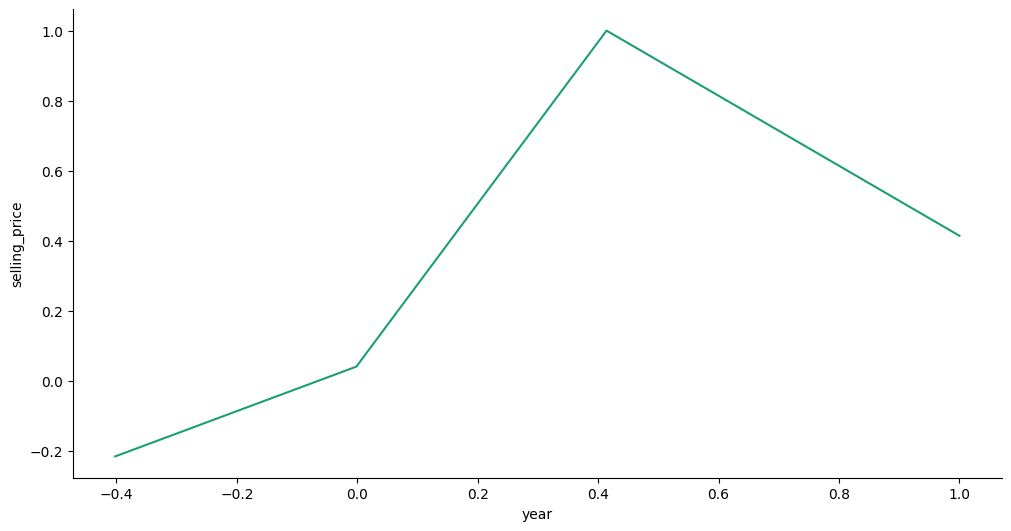

In [133]:


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['selling_price']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = correlations.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('selling_price')

In [134]:
print("\nSummary statistics:")
d2_train.describe().T


Summary statistics:


,count,mean,std,min,25%,50%,75%,max
year,6502.0,2013.797293,4.066908,1983.0,2011.00,2015.0,2017.0,2020.0
km_driven,6502.0,70050.983236,58357.789482,1.0,35000.00,60000.0,98000.0,2360457.0
seats,6332.0,5.414719,0.956398,2.0,5.00,5.0,5.0,14.0
selling_price,6502.0,638656.852815,805408.721967,29999.0,254249.75,450000.0,680000.0,10000000.0


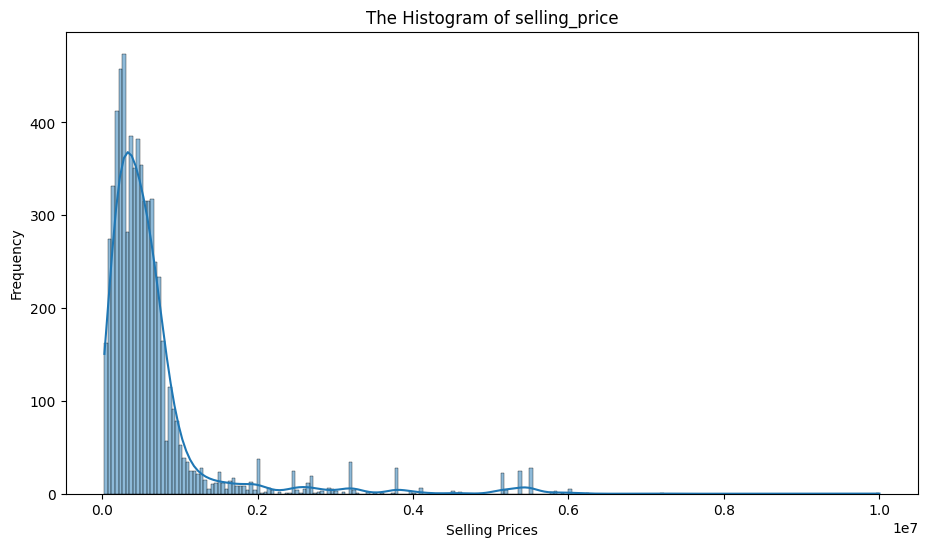

In [135]:
p.figure(figsize=(11, 6))
sns.histplot(data=d2_train, x='selling_price', kde=True)
p.title('The Histogram of selling_price')
p.xlabel('Selling Prices')
p.ylabel('Frequency')
p.show()

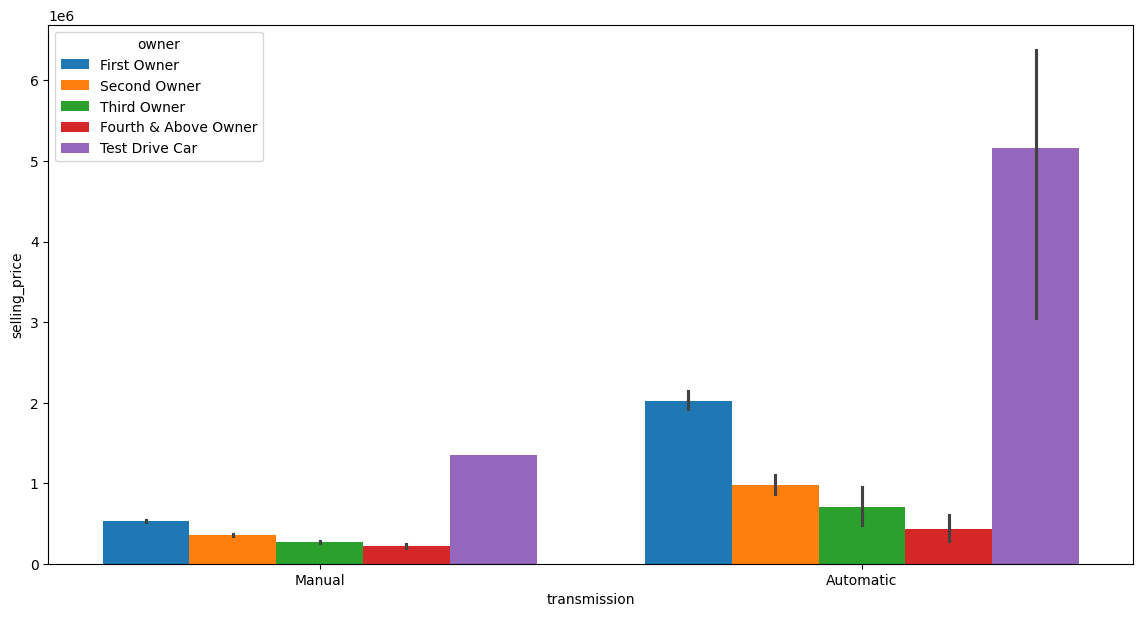

In [137]:
p.figure(figsize = (14, 7))
sns.barplot(x = "transmission", y = "selling_price", hue = "owner", data = d2, saturation = 1);

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import sklearn.compose

In [142]:
numerical_attributes=X_train.select_dtypes(include=["float64","int64"]).columns
categorical_attributes=X_train.select_dtypes(include="object").columns

ct=sklearn.compose.ColumnTransformer([("Standard_scaling",sklearn.preprocessing.StandardScaler(),numerical_attributes), ("One_hot_encoding",sklearn.preprocessing.OneHotEncoder(handle_unknown="ignore"),categorical_attributes)])

ct.fit(X_train)
X_train=ct.transform(X_train)
X_test=ct.transform(X_test)
print("x_train :",X_train.shape)
print("x_test :",X_test.shape)

x_train : (6502, 3135)
x_test : (1626, 3135)
